# 1. Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime,time
from wordcloud import WordCloud, STOPWORDS

# 2. Nhập dữ liệu từ file .csv và chuyển sang đúng định dạng

In [2]:
IMAGES_PATH = 'Images/'
#pd.set_option('display.max_colwidth',None) // Hiển thị đầy đủ dữ liệu trong dataframe
df = pd.read_csv('Data/unity3dCleaned.csv')

In [3]:
def DatetimeParse(inputStr : str = None) -> datetime:
    return datetime.strptime(inputStr,"%Y-%m-%d %H:%M:%S")
def DatetimeParseComment(inputStr : str = None) -> datetime:
    return datetime.strptime(inputStr, "%Y, %m, %d, %H, %M")
for i in range(len(df)):
    df['Time'].at[i] = DatetimeParse(df['Time'].iloc[i])
for i in range(len(df)):
    df['Comments'].at[i] = ast.literal_eval(df['Comments'].iloc[i])
    for j in range(len(df['Comments'].iloc[i])):
        df['Comments'].iloc[i][j]['Time'] = DatetimeParseComment(df['Comments'].iloc[i][j]['Time'])

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              192 non-null    int64 
 1   Text            192 non-null    object
 2   Time            192 non-null    object
 3   Reaction Count  192 non-null    int64 
 4   Share Count     192 non-null    int64 
 5   Comment Count   192 non-null    int64 
 6   Comments        192 non-null    object
 7   Like Count      192 non-null    int64 
 8   Love Count      192 non-null    int64 
 9   Haha Count      192 non-null    int64 
 10  Wow Count       192 non-null    int64 
 11  Care Count      192 non-null    int64 
 12  Sad Count       192 non-null    int64 
 13  Angry Count     192 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 21.1+ KB


,Id,Reaction Count,Share Count,Comment Count,Like Count,Love Count,Haha Count,Wow Count,Care Count,Sad Count,Angry Count
count,1.920000e+02,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,7.494381e+15,239.760417,15.598958,15.192708,203.906250,18.572917,1.505208,2.098958,1.145833,0.140625,12.390625
std,4.272370e+15,540.111114,26.328186,64.878375,511.127715,26.120039,5.671641,6.233300,2.109461,0.441340,60.064089
min,6.492983e+14,11.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.193734e+14,44.000000,4.000000,2.000000,41.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.015987e+16,94.500000,8.500000,5.000000,80.500000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.016001e+16,226.250000,18.500000,11.000000,180.000000,24.000000,1.000000,2.000000,1.000000,0.000000,1.000000
max,1.016021e+16,5171.000000,246.000000,882.000000,5037.000000,189.000000,56.000000,71.000000,17.000000,3.000000,630.000000


# 3. Tiến hành phân tích dữ liệu

Hàm hỗ trợ

In [5]:
def GetDataFromBetweenTime(data : pd.DataFrame = None,fromTime : datetime = None,toTime : datetime = None) -> pd.DataFrame:
    return data[(data['Time']>=fromTime) & (df['Time'] <= toTime)]

## <span style = "font-size: smaller"> Thời gian bài viết được đăng trong ngày</span> 

In [6]:
maxTime = 24*3600
def GetTimeValue(inputTime : time = None) -> int:
    return inputTime.hour * 3600 + inputTime.minute * 60 + inputTime.second
timeSeries = pd.Series()
for i in range(len(df)):
    timeSeries.at[i] = GetTimeValue(df['Time'].iloc[i].time())

In [7]:
postLenSeries = pd.Series()
for i in range(len(df['Text'])):
    postLenSeries.at[i] = len(df['Text'].iloc[i])

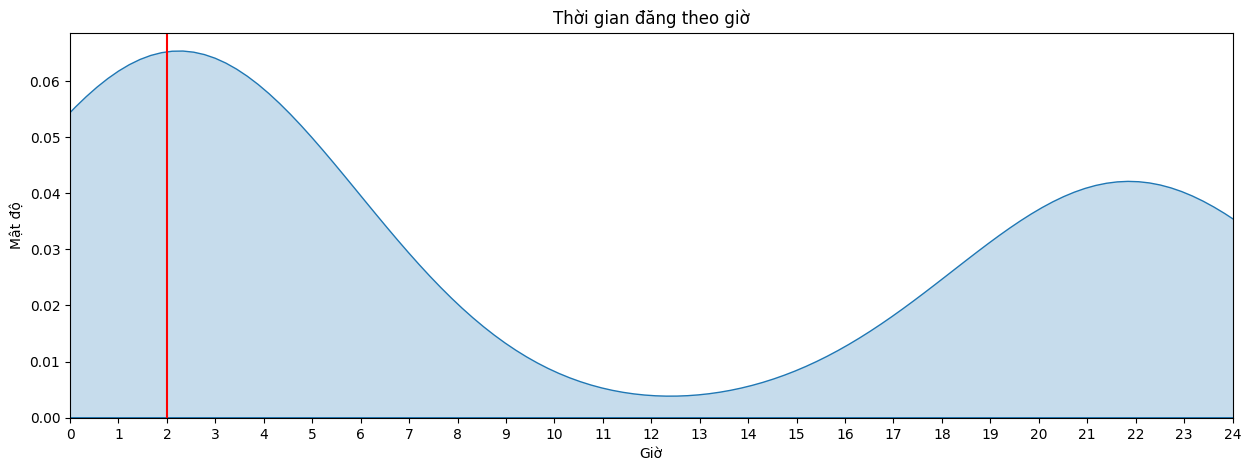

In [8]:
plt.figure(figsize=(15,5))
sns.kdeplot(timeSeries/3600,fill=True)
plt.title("Thời gian đăng theo giờ")
plt.xticks(range(0,25))
plt.axvline(x=2,color='red')
plt.xlim(0,24)
plt.ylabel('Mật độ')
plt.xlabel('Giờ')
plt.savefig(IMAGES_PATH + 'Fig1_PostDensityByTime.png',bbox_inches='tight')

Số bài đăng theo các ngày trong tuần

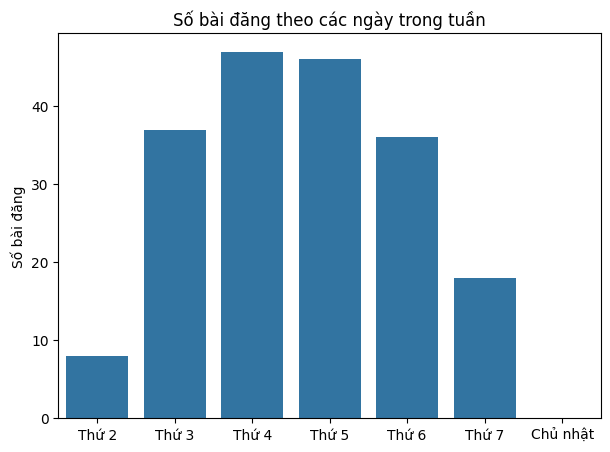

In [9]:
xLabel = ['Thứ 2','Thứ 3','Thứ 4','Thứ 5','Thứ 6','Thứ 7','Chủ nhật']
dayOWeek = [0]*7
for dtime in df['Time']:
    dow = dtime.weekday()
    dayOWeek[dow] += 1
plt.figure(figsize=(7,5))
sns.barplot(x=xLabel,y=dayOWeek)
plt.ylabel('Số bài đăng')
plt.title('Số bài đăng theo các ngày trong tuần')
plt.savefig(IMAGES_PATH + 'Fig1.1_PostAmountByDayOfWeek.png',bbox_inches='tight')

## <span style = "font-size: smaller"> Nội dung bài viết</span> 

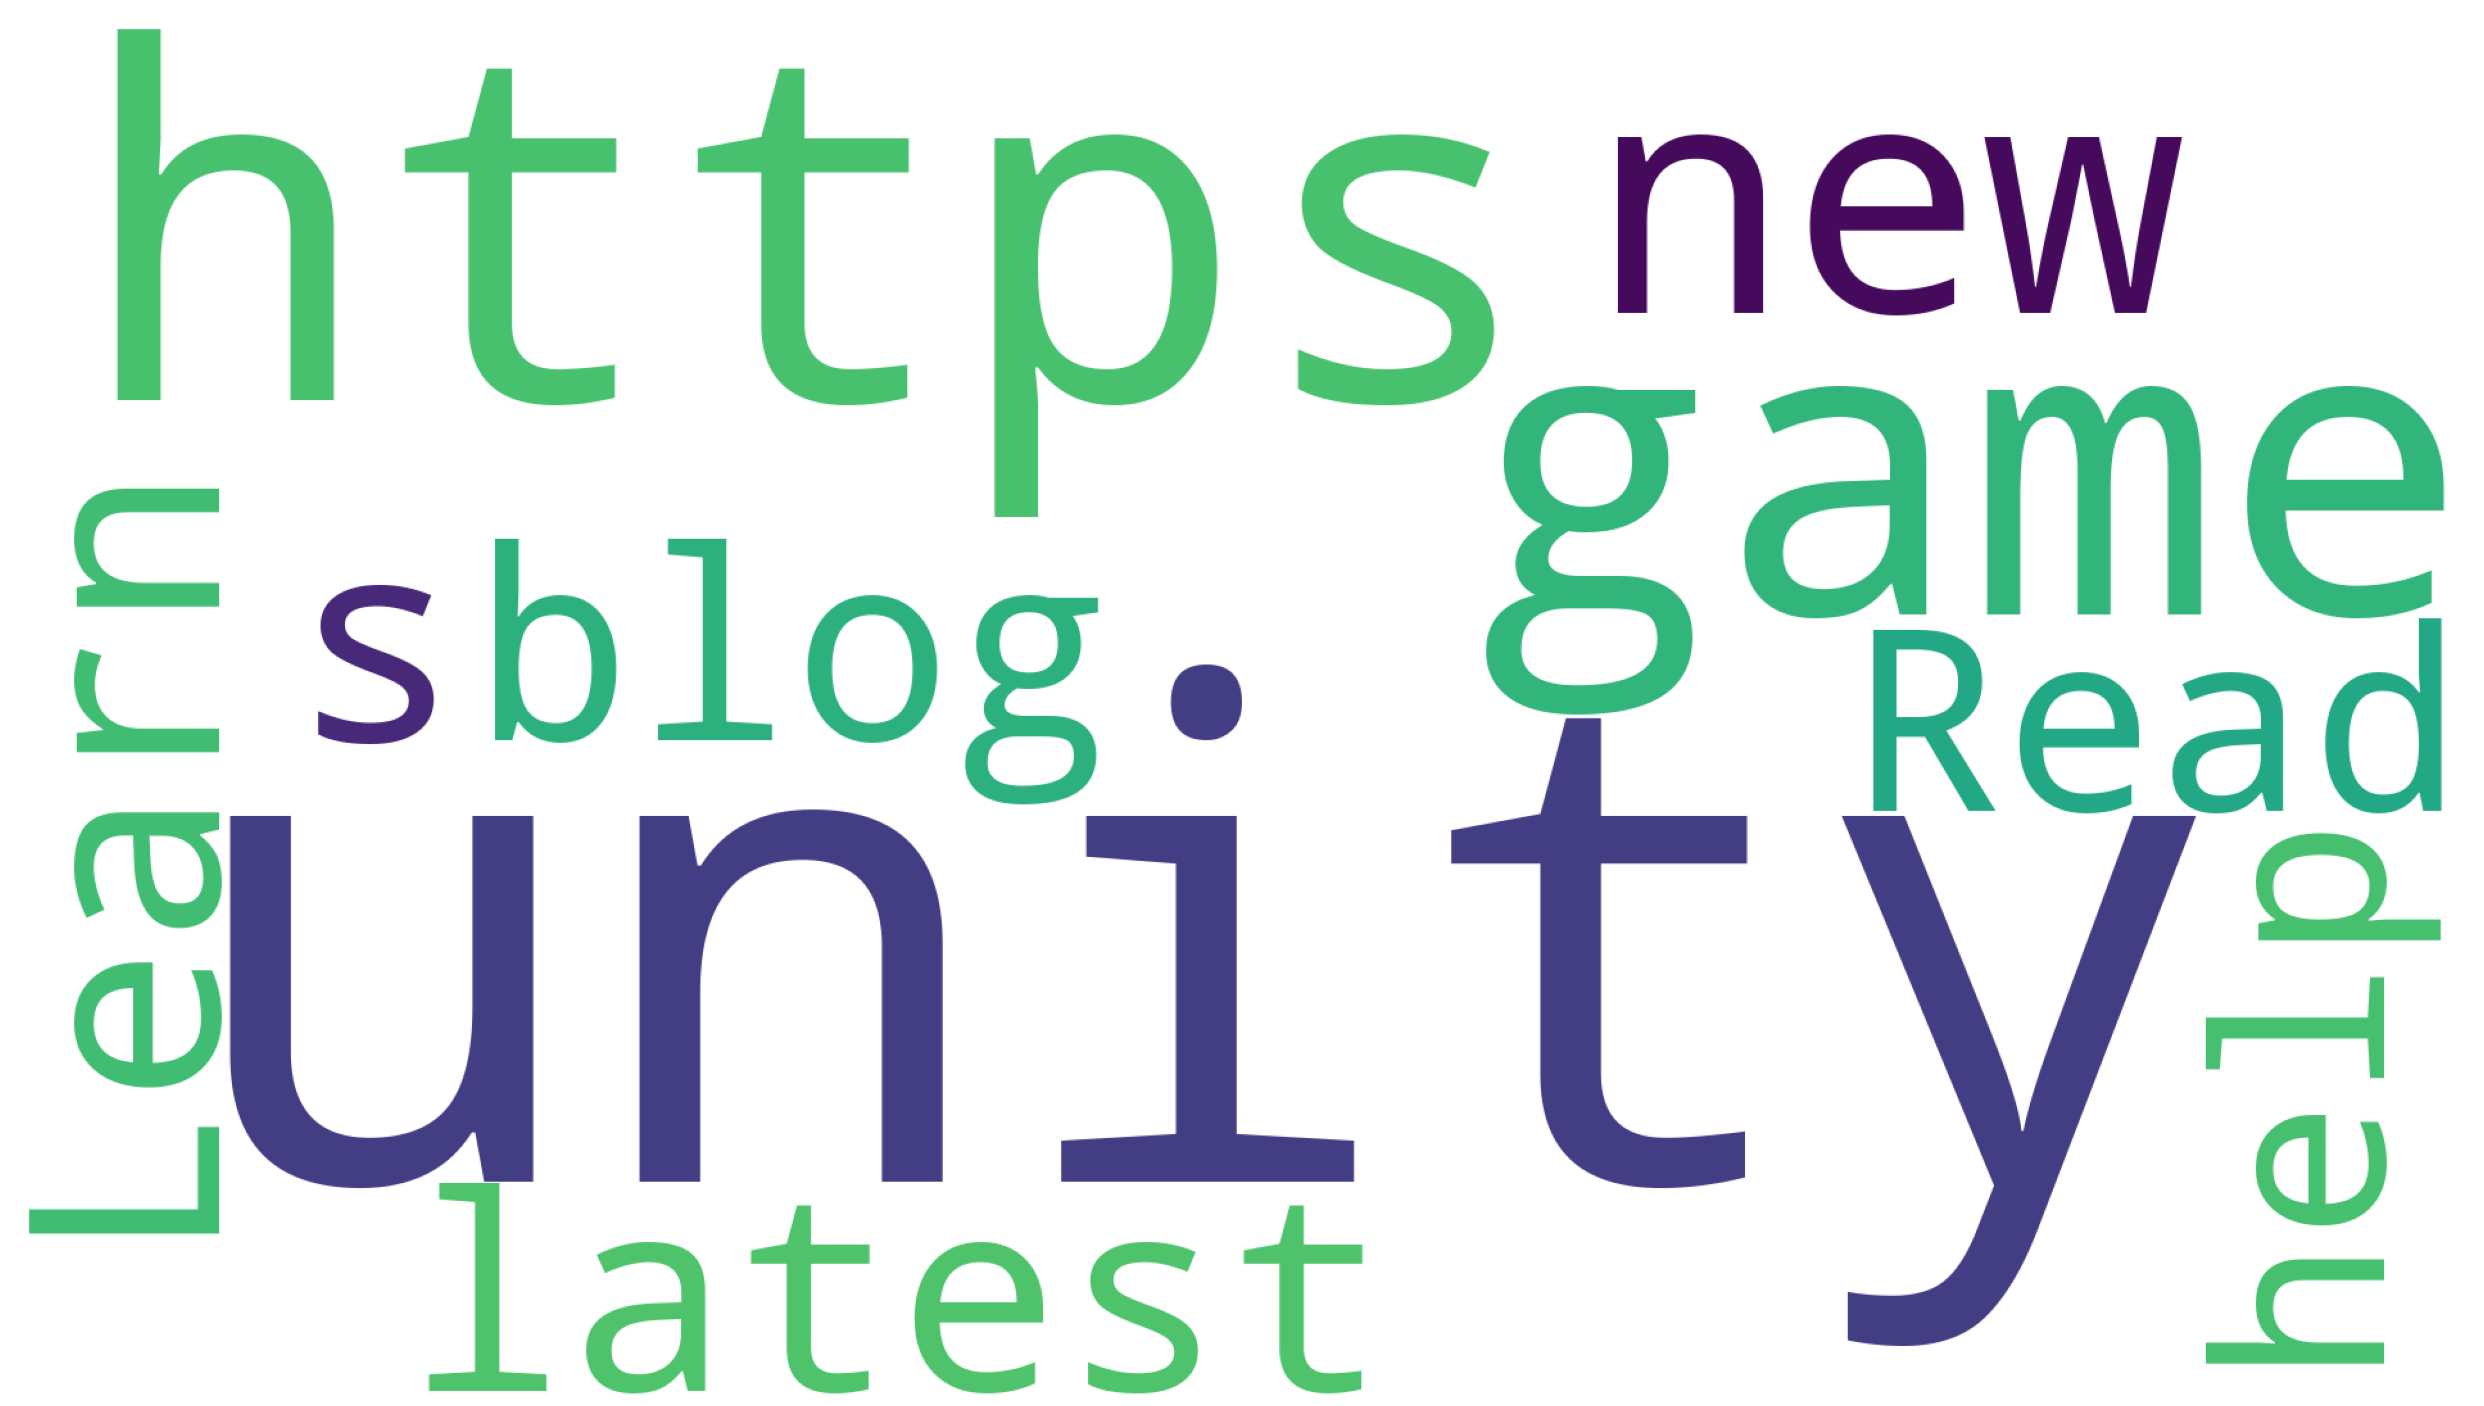

In [10]:
fullPostText = ''
#tdf = GetDataFromBetweenTime(df,datetime(2023,9,1),datetime(2023,11,1))
tdf = df
for ele in tdf['Text']:
    fullPostText += ele
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white', max_words=10,width=1920, height=1080).generate(fullPostText)
plt.figure(figsize=(32,18))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig(IMAGES_PATH + 'Fig5_PostTextWordCloud.png',bbox_inches='tight')
plt.show()

Số lượng và tỉ lệ một vài từ trong nội dung bài viết

In [11]:
countUnity = 0
countGame = 0
for i in range(len(df)):
    if ('Unity' in df['Text'].iloc[i] or 'unity' in df['Text'].iloc[i]):
        countUnity += 1
    if ('Game' in df['Text'].iloc[i] or 'game' in df['Text'].iloc[i]):
        countGame += 1
print(countUnity," ",len(df)," ",countUnity/len(df))
print(countGame," ",len(df)," ",countGame/len(df))

171   192   0.890625
91   192   0.4739583333333333


## <span style = "font-size: smaller"> Nội dung bình luận</span> 

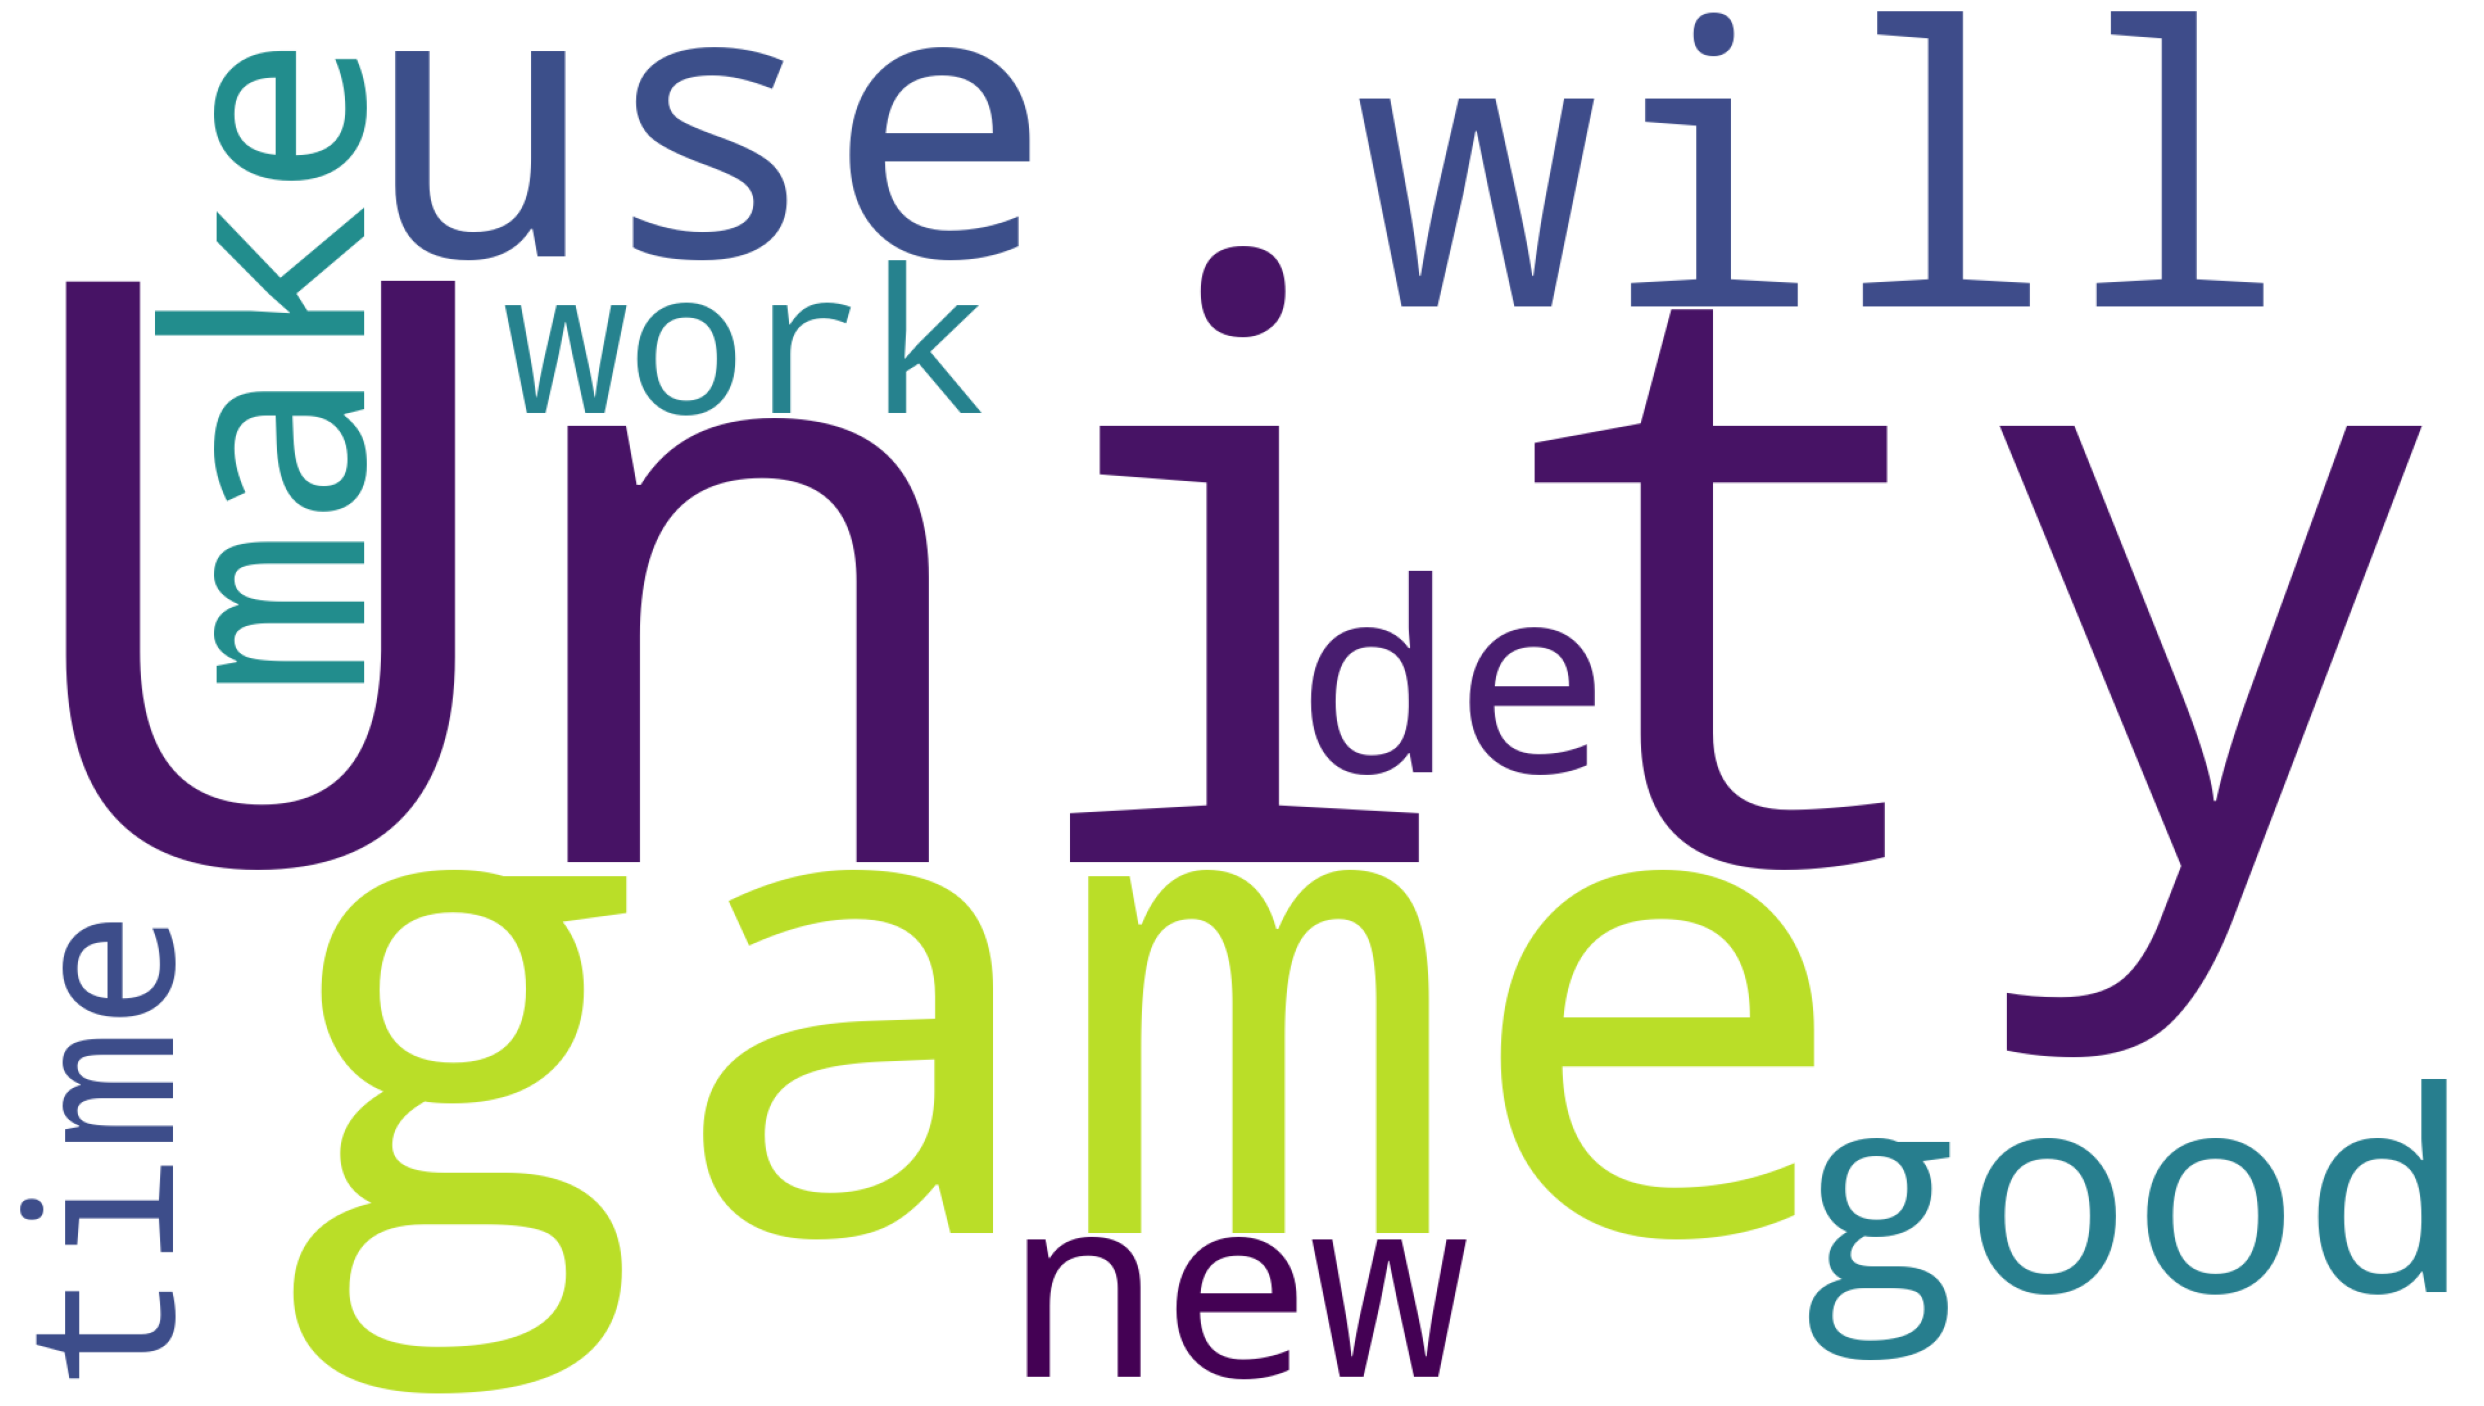

In [12]:
fullCommentText = ''
#tdf = GetDataFromBetweenTime(df,datetime(2023,9,1),datetime(2023,11,1))
tdf = df
for ele in tdf['Comments']:
    for index in range(len(ele)):
        fullCommentText += ele[index]['Text']
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white', max_words=10,width=1920, height=1080).generate(fullCommentText)
plt.figure(figsize=(32,18))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig(IMAGES_PATH + 'Fig6_CommentWordCloud.png',bbox_inches='tight')
plt.show()

Số lượng và tỉ lệ một vài từ trong bình luận

In [13]:
countUnity = 0
countGame = 0
cmtAll = []
for i in range(len(df)):
    for j in range(len(df['Comments'].iloc[i])):
        cmtAll.append(df['Comments'].iloc[i][j])
for ele in cmtAll:
    if ('Unity' in ele['Text'] or 'unity' in ele['Text']):
        countUnity += 1
    if ('Game' in ele['Text'] or 'game' in ele['Text']):
        countGame += 1
print(countUnity," ",len(cmtAll)," ",countUnity/len(cmtAll))
print(countGame," ",len(cmtAll)," ",countGame/len(cmtAll))

120   706   0.16997167138810199
103   706   0.14589235127478753


## <span style = "font-size: smaller"> Bài viết có lượt tương tác nhiều nhất</span> 

In [14]:
maxReaction = -1
maxReactionIndex = -1
maxComment = -1
maxCommentIndex = -1
maxShare = -1
maxShareIndex = -1
for i in range(len(df['Reaction Count'])):
    if (maxReaction < df['Reaction Count'].iloc[i]):
        maxReaction = df['Reaction Count'].iloc[i]
        maxReactionIndex = i
    if (maxComment < df['Comment Count'].iloc[i]):
        maxComment = df['Comment Count'].iloc[i]
        maxCommentIndex = i
    if (maxShare < df['Share Count'].iloc[i]):
        maxShare = df['Share Count'].iloc[i]
        maxShareIndex = i
    
print("Max reaction :",maxReaction,"at",maxReactionIndex,"with post id :",df['Id'].iloc[maxReactionIndex],"posted on",df['Time'].iloc[maxReactionIndex])
print("Max comment :",maxComment,"at",maxCommentIndex,"with post id :",df['Id'].iloc[maxCommentIndex],"posted on",df['Time'].iloc[maxCommentIndex])
print("Max share :",maxShare,"at",maxShareIndex,"with post id :",df['Id'].iloc[maxShareIndex],"posted on",df['Time'].iloc[maxShareIndex])
    

Max reaction : 5171 at 102 with post id : 10160004992236773 posted on 2023-03-30 03:29:36
Max comment : 882 at 17 with post id : 681380930688217 posted on 2023-09-12 02:29:21
Max share : 246 at 17 with post id : 681380930688217 posted on 2023-09-12 02:29:21


## <span style = "font-size: smaller"> Sự tương quan giữa độ dài bài viết và số lượt tương tác của bài viết</span> 

Tính trục thời gian theo chiều ngang (Ox)

In [15]:
minTime = df['Time'].min()
maxTime = df['Time'].max()
xtickArr = []
for i in range(minTime.month,maxTime.month+(maxTime.year-minTime.year)*12+2):
    yearAdd = i//12
    monthAdd = i%12
    if (monthAdd == 0):
        monthAdd = 12
        yearAdd -= 1
    tempDate = datetime(minTime.year+yearAdd,monthAdd,1)
    xtickArr.append(tempDate)
xtickArr.remove(xtickArr[0])
xtickArr[0] = minTime
xtickArr[len(xtickArr)-1] = maxTime

Tương quan giữa số lượt chia sẻ, bình luận, reaction và độ dài bài viết

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Chia sẻ    192 non-null    int64
 1   Bình luận  192 non-null    int64
 2   Reaction   192 non-null    int64
 3   Độ dài     192 non-null    int64
dtypes: int64(4)
memory usage: 6.1 KB


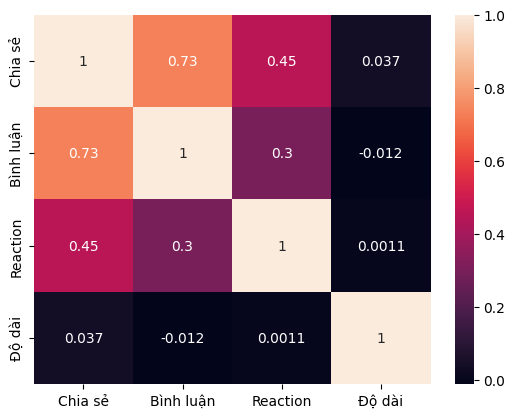

In [16]:
df['Post Length'] = postLenSeries
tdf = df[['Share Count','Comment Count','Reaction Count','Post Length']]
colName = {'Share Count':'Chia sẻ','Comment Count':'Bình luận','Reaction Count':'Reaction','Post Length':'Độ dài'}
tdf = tdf.rename(columns=colName)
tdf.info()
corrMatrix = tdf.corr()
sns.heatmap(corrMatrix,annot=True)
plt.savefig(IMAGES_PATH + 'Fig4_ShareCommentReactionLengthHMap.png',bbox_inches='tight')

Dự đoán số lượt chia sẻ dựa trên số lượt bình luận và reaction dựa trên Linear Regression

In [26]:
features = df[['Comment Count','Reaction Count']]
target = df['Share Count']
xTrain,xTest,yTrain,yTest = train_test_split(features,target,test_size=0.2,shuffle=True)
yTest = pd.Series(yTest.to_list())
model = LinearRegression()
model.fit(xTrain,yTrain)
yPredict = model.predict(xTest)
meanPredict = yPredict.mean()
meanTest = yTest.mean()
rmse = 0
mae = 0
for index in range(len(yTest)):
    print(yTest[index],':',round(yPredict[index]))
    rmse += (yTest[index]-yPredict[index])**2
    mae += abs(yTest[index]-yPredict[index])
rmse = np.sqrt(rmse/len(yTest))
mae = mae/len(yTest)
print('Sai số toàn phương trung bình :',rmse**2)
print('Sai số tuyệt đối trung bình :',mae)

17 : 18
0 : 8
2 : 9
4 : 8
47 : 112
1 : 8
21 : 13
3 : 12
7 : 18
7 : 23
30 : 13
14 : 11
4 : 8
5 : 8
16 : 10
7 : 8
28 : 19
8 : 29
2 : 21
0 : 8
4 : 9
21 : 14
14 : 10
10 : 11
26 : 20
12 : 11
2 : 10
20 : 15
6 : 10
0 : 8
182 : 44
37 : 15
32 : 23
5 : 9
4 : 9
1 : 8
10 : 11
7 : 14
4 : 10
Sai số toàn phương trung bình : 674.6129774383713
Sai số tuyệt đối trung bình : 12.19543666774687


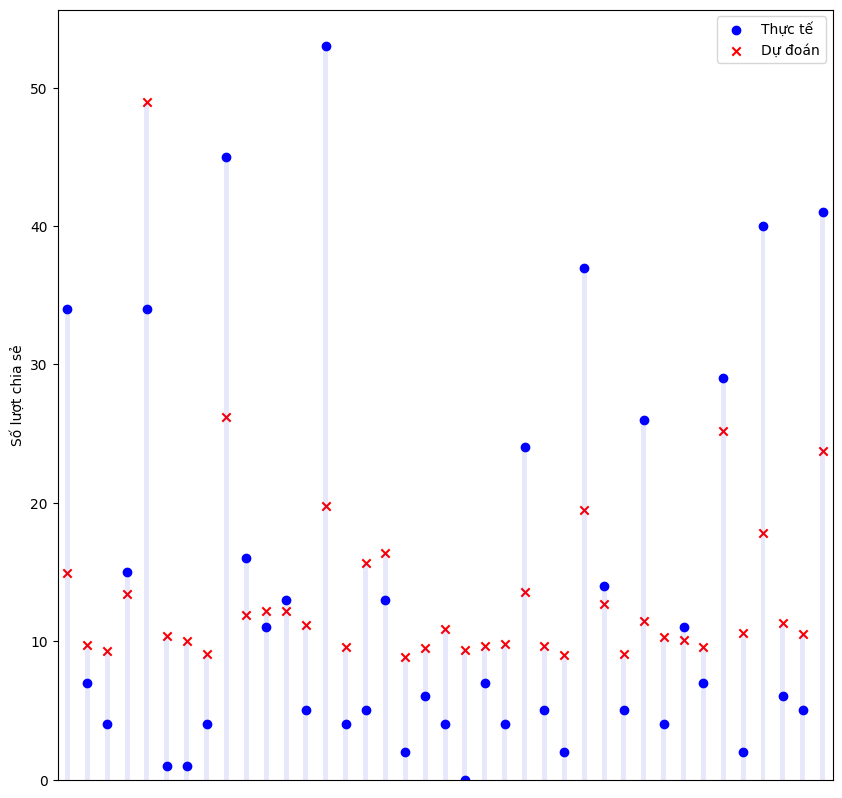

In [59]:
plt.figure(figsize=(10,10))
xAxis = range(0,len(yPredict))
colVisual = []
for i in range(len(yPredict)):
    colVisual.append(max(yPredict[i],yTest[i]))
plt.scatter(xAxis,yTest,color = 'blue',marker='o')
plt.scatter(xAxis,yPredict,color= 'red',marker='x')
sns.barplot(colVisual,alpha = 0.1,width=0.25,color='blue')
plt.ylabel('Số lượt chia sẻ')
plt.xticks([])
plt.legend(['Thực tế','Dự đoán'])
plt.savefig(IMAGES_PATH + 'Fig2.1_SharePredictShuffle.png',bbox_inches='tight')

## <span style = "font-size: smaller"> Số lượt và tỉ lệ các reactions</span> 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


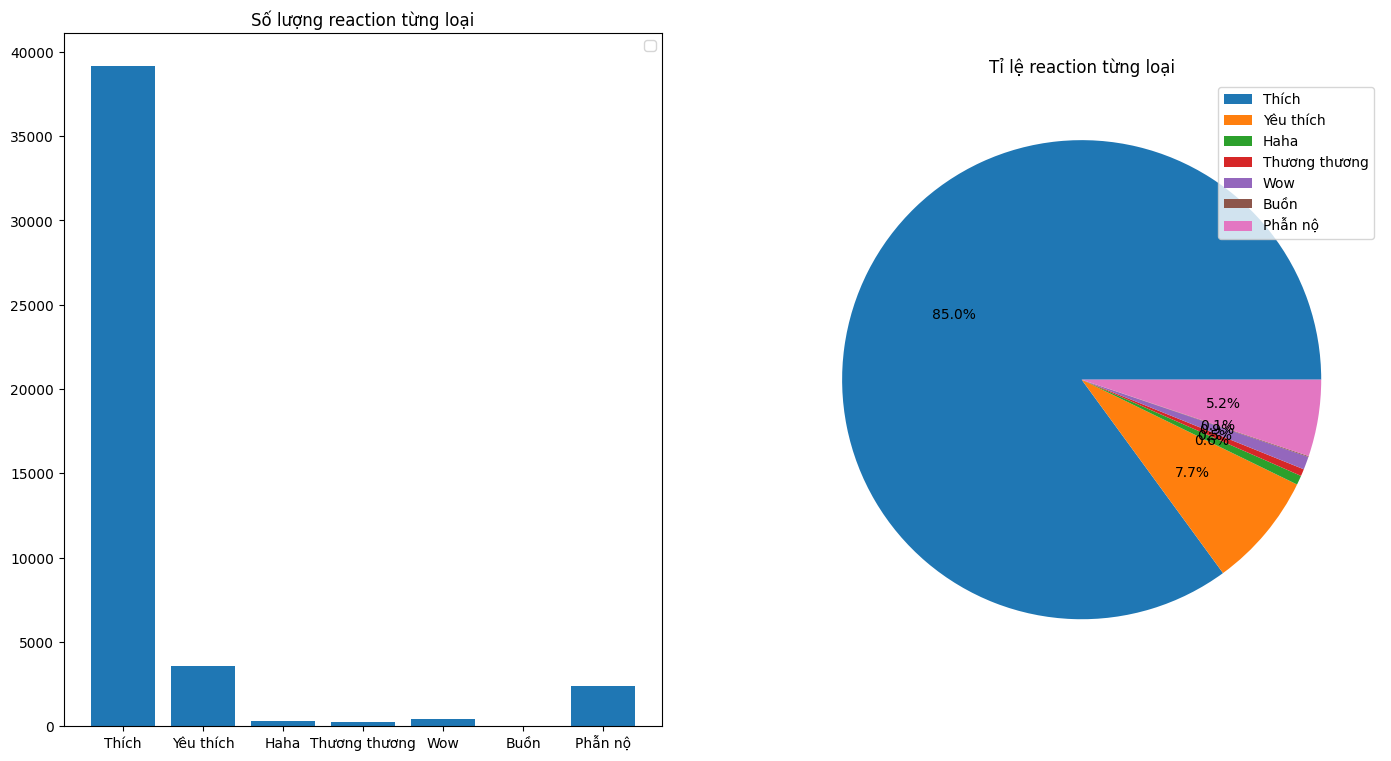

In [35]:
tdf = df#GetDataFromBetweenTime(df,datetime(2023,9,1),datetime(2023,10,1))
pieSeries = pd.Series(
                    {'Like' : tdf['Like Count'].sum(),'Love' : tdf['Love Count'].sum()
                     ,'Haha' : tdf['Haha Count'].sum(),'Care' : tdf['Care Count'].sum()
                     ,'Wow' : tdf['Wow Count'].sum(),'Sad' : tdf['Sad Count'].sum()
                     ,'Angry' : tdf['Angry Count'].sum()})
labels = ['Thích','Yêu thích','Haha','Thương thương','Wow','Buồn','Phẫn nộ']
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(17,9))
ax2.pie(data=pieSeries,x=pieSeries,autopct='%1.1f%%')
ax1.bar(x=labels,height=pieSeries)
ax1.set_title('Số lượng reaction từng loại')
ax2.legend(labels)
ax1.legend()
ax2.set_title('Tỉ lệ reaction từng loại')
plt.savefig(IMAGES_PATH + 'Fig3_ReactionAmount.png',bbox_inches='tight')
plt.show()

In [32]:
print(pieSeries)

Like     39150
Love      3566
Haha       289
Care       220
Wow        403
Sad         27
Angry     2379
dtype: int64


## <span style = "font-size: smaller"> Số lượt chia sẻ, bình luận, reaction theo thời gian</span> 

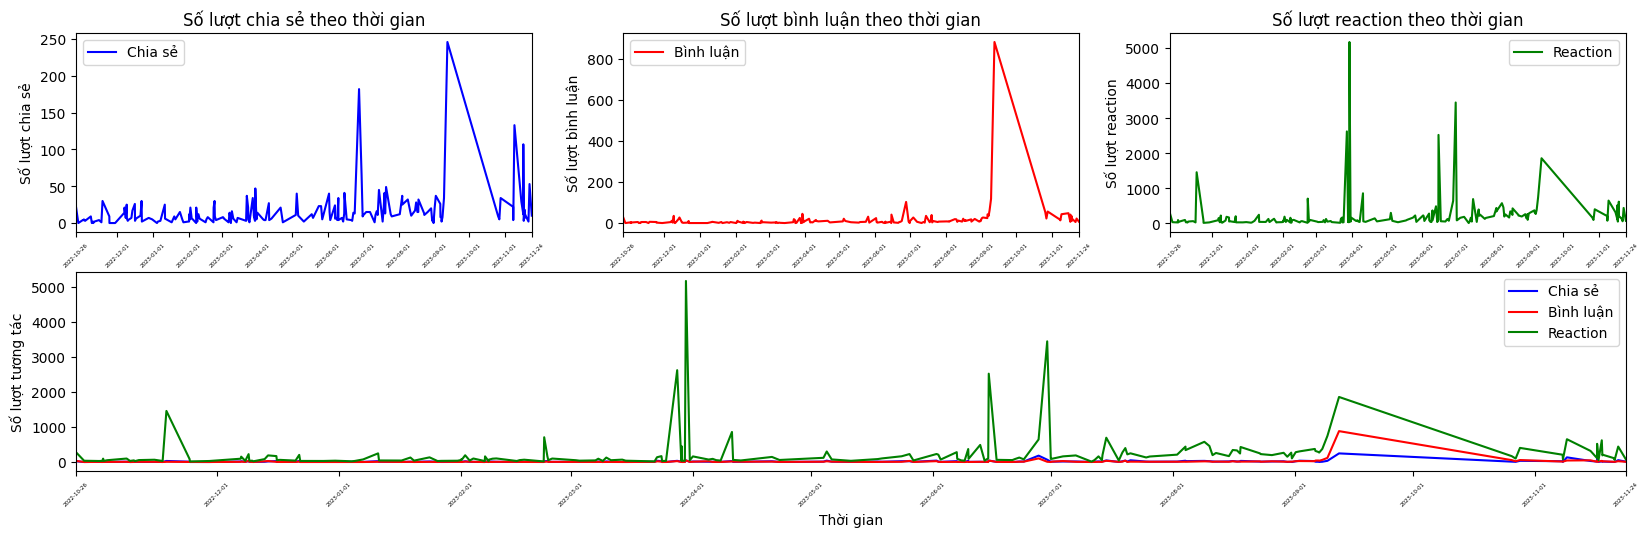

In [33]:
x_label = df['Time']
plt.figure(figsize=(20,15))
ax1 = plt.subplot(5,3,1)
ax2 = plt.subplot(5,3,2)
ax3 = plt.subplot(5,3,3)
ax4 = plt.subplot(5,1,2)
sns.lineplot(ax=ax1,x=x_label,label='Chia sẻ',y=df['Share Count'],color='blue')
sns.lineplot(ax=ax2,x=x_label,label='Bình luận',y=df['Comment Count'],color='red')
sns.lineplot(ax=ax3,x=x_label,label='Reaction',y=df['Reaction Count'],color='green')
sns.lineplot(ax=ax4,x=x_label,label='Chia sẻ',y=df['Share Count'],color='blue')
sns.lineplot(ax=ax4,x=x_label,label='Bình luận',y=df['Comment Count'],color='red')
sns.lineplot(ax=ax4,x=x_label,label='Reaction',y=df['Reaction Count'],color='green')
ax1.set_xlabel('Thời gian')
ax1.set_ylabel('Số lượt chia sẻ')
ax1.set_title('Số lượt chia sẻ theo thời gian')
ax2.set_xlabel('Thời gian')
ax2.set_ylabel('Số lượt bình luận')
ax2.set_title('Số lượt bình luận theo thời gian')
ax3.set_xlabel('Thời gian')
ax3.set_ylabel('Số lượt reaction')
ax3.set_title('Số lượt reaction theo thời gian')
ax4.set_xlabel('Thời gian')
ax4.set_ylabel('Số lượt tương tác')
#ax4.set_title('Số lượt tương tác theo thời gian')
ax1.set_xlim(minTime,maxTime)
ax1.set_xticks(xtickArr)
ax2.set_xlim(minTime,maxTime)
ax2.set_xticks(xtickArr)
ax3.set_xlim(minTime,maxTime)
ax3.set_xticks(xtickArr)
ax4.set_xlim(minTime,maxTime)
ax4.set_xticks(xtickArr)
ax1.tick_params(axis='x',rotation = 45,labelsize = 4)
ax2.tick_params(axis='x',rotation = 45,labelsize = 4)
ax3.tick_params(axis='x',rotation = 45,labelsize = 4)
ax4.tick_params(axis='x',rotation = 45,labelsize = 4)
plt.legend()
plt.savefig(IMAGES_PATH + 'Fig2_InteractionByTime.png',dpi=300,bbox_inches='tight')
plt.show()

In [34]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              192 non-null    int64 
 1   Text            192 non-null    object
 2   Time            192 non-null    object
 3   Reaction Count  192 non-null    int64 
 4   Share Count     192 non-null    int64 
 5   Comment Count   192 non-null    int64 
 6   Comments        192 non-null    object
 7   Like Count      192 non-null    int64 
 8   Love Count      192 non-null    int64 
 9   Haha Count      192 non-null    int64 
 10  Wow Count       192 non-null    int64 
 11  Care Count      192 non-null    int64 
 12  Sad Count       192 non-null    int64 
 13  Angry Count     192 non-null    int64 
 14  Post Length     192 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 22.6+ KB


,Id,Reaction Count,Share Count,Comment Count,Like Count,Love Count,Haha Count,Wow Count,Care Count,Sad Count,Angry Count,Post Length
count,1.920000e+02,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,7.494381e+15,239.760417,15.598958,15.192708,203.906250,18.572917,1.505208,2.098958,1.145833,0.140625,12.390625,288.093750
std,4.272370e+15,540.111114,26.328186,64.878375,511.127715,26.120039,5.671641,6.233300,2.109461,0.441340,60.064089,112.245111
min,6.492983e+14,11.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000
25%,7.193734e+14,44.000000,4.000000,2.000000,41.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,224.750000
50%,1.015987e+16,94.500000,8.500000,5.000000,80.500000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,274.000000
75%,1.016001e+16,226.250000,18.500000,11.000000,180.000000,24.000000,1.000000,2.000000,1.000000,0.000000,1.000000,327.750000
max,1.016021e+16,5171.000000,246.000000,882.000000,5037.000000,189.000000,56.000000,71.000000,17.000000,3.000000,630.000000,880.000000
